In [1]:
%load_ext autoreload
%autoreload 2

# Experiments with WMF model

In [2]:
from pathlib import Path

import scipy.sparse
import numpy as np

import matplotlib.pyplot as plt

import src.io as io
import src.evaluation as evaluation
import src.evaluation.splits
import src.evaluation.base

from src.algorithm.baseline.wmf import WMF

## Datasets

In [3]:
## Uncomment corresponding directory.
## RETARGET True for Frappe, False for the others

DATA_DIR, RETARGET = Path('../../../data/CARS/Mobile_Frappe/'), True
# DATA_DIR, RETARGET = Path('../../../data/CARS/Food_com/'), False
# DATA_DIR, RETARGET = Path('../../../data/CARS/TripAdvisor/'), False

In [4]:
# Shouldn't need to change this info
INTERACTIONS = DATA_DIR / 'interactions.csv'

SEED = 123456
SEED2 = 78910

ITEM_ID = 'item'
USER_ID = 'user'

## Parse data

In [5]:
data = io.parse_interactions_with_context(INTERACTIONS, item_id=ITEM_ID, user_id=USER_ID)
data.df

,userId,itemId,daytime,weather,weekday
0,0,0,1,1,1
1,1,1,2,2,2
2,2,2,3,2,3
3,3,3,4,0,4
4,4,4,5,1,4
...,...,...,...,...,...
95997,109,0,3,1,1
95998,37,16,4,2,1
95999,180,33,2,2,1
96000,445,751,3,1,1


## Make train/val split for hyperparam tuning

In [6]:
Xtrain, Xval_in, Xval_out = evaluation.splits.leave_one_out_split_non_context(data, seed=SEED)

## Inspect performance per training step

In [7]:
alg = WMF(k=80, l2=100, v=1, alpha=200, max_iterations=1)
alg.initialize(Xtrain)
scores = evaluation.base.eval(alg, Xval_in, Xval_out, retarget=True)
print("init", scores)

Evaluating with 816 users
init {'MRR@5': 0.13282271241830065, 'MRR@20': 0.141887875337782, 'Average Recall@5': 0.23529411764705882, 'Average Recall@20': 0.3284313725490196}


In [8]:
for i in range(20):
    alg.train(Xtrain)
    scores = evaluation.base.eval(alg, Xval_in, Xval_out, retarget=True)
    print(i, scores)

  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
0 {'MRR@5': 0.1578839869281046, 'MRR@20': 0.18543261534676464, 'Average Recall@5': 0.28921568627450983, 'Average Recall@20': 0.5735294117647058}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
1 {'MRR@5': 0.1795751633986928, 'MRR@20': 0.2095329396438598, 'Average Recall@5': 0.32230392156862747, 'Average Recall@20': 0.6053921568627451}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
2 {'MRR@5': 0.19334150326797384, 'MRR@20': 0.2226358727632118, 'Average Recall@5': 0.3394607843137255, 'Average Recall@20': 0.616421568627451}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
3 {'MRR@5': 0.1985089869281046, 'MRR@20': 0.22550302555467255, 'Average Recall@5': 0.35661764705882354, 'Average Recall@20': 0.6299019607843137}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
4 {'MRR@5': 0.19975490196078433, 'MRR@20': 0.22667671895228922, 'Average Recall@5': 0.36151960784313725, 'Average Recall@20': 0.6372549019607843}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
5 {'MRR@5': 0.20247140522875814, 'MRR@20': 0.23014949266798884, 'Average Recall@5': 0.3602941176470588, 'Average Recall@20': 0.6446078431372549}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
6 {'MRR@5': 0.20447303921568627, 'MRR@20': 0.2318878810211218, 'Average Recall@5': 0.36519607843137253, 'Average Recall@20': 0.6458333333333334}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
7 {'MRR@5': 0.2045955882352941, 'MRR@20': 0.23136762088598045, 'Average Recall@5': 0.36764705882352944, 'Average Recall@20': 0.6421568627450981}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
8 {'MRR@5': 0.20716911764705884, 'MRR@20': 0.23351478080978627, 'Average Recall@5': 0.37254901960784315, 'Average Recall@20': 0.6433823529411765}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
9 {'MRR@5': 0.20571895424836603, 'MRR@20': 0.23267675630377097, 'Average Recall@5': 0.3713235294117647, 'Average Recall@20': 0.6433823529411765}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
10 {'MRR@5': 0.20861928104575161, 'MRR@20': 0.23491679007494662, 'Average Recall@5': 0.3713235294117647, 'Average Recall@20': 0.6397058823529411}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
11 {'MRR@5': 0.20829248366013073, 'MRR@20': 0.23433610788885334, 'Average Recall@5': 0.375, 'Average Recall@20': 0.6421568627450981}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
12 {'MRR@5': 0.2077410130718954, 'MRR@20': 0.23363869234640727, 'Average Recall@5': 0.3762254901960784, 'Average Recall@20': 0.6446078431372549}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
13 {'MRR@5': 0.20825163398692811, 'MRR@20': 0.23439875239624264, 'Average Recall@5': 0.3737745098039216, 'Average Recall@20': 0.6384803921568627}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
14 {'MRR@5': 0.20786356209150328, 'MRR@20': 0.23397784139395414, 'Average Recall@5': 0.3737745098039216, 'Average Recall@20': 0.6384803921568627}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
15 {'MRR@5': 0.20868055555555556, 'MRR@20': 0.23484749845001282, 'Average Recall@5': 0.375, 'Average Recall@20': 0.6397058823529411}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
16 {'MRR@5': 0.20931372549019608, 'MRR@20': 0.23550240840693404, 'Average Recall@5': 0.3737745098039216, 'Average Recall@20': 0.6372549019607843}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
17 {'MRR@5': 0.2091299019607843, 'MRR@20': 0.2358402069506035, 'Average Recall@5': 0.3737745098039216, 'Average Recall@20': 0.6360294117647058}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
18 {'MRR@5': 0.20929330065359478, 'MRR@20': 0.23551900283256139, 'Average Recall@5': 0.3737745098039216, 'Average Recall@20': 0.633578431372549}


  0%|          | 0/1 [00:00<?, ?it/s]

Evaluating with 816 users
19 {'MRR@5': 0.20904820261437906, 'MRR@20': 0.23596665849684995, 'Average Recall@5': 0.37254901960784315, 'Average Recall@20': 0.6372549019607843}


## Link between magnitude of factors and popularity

In [7]:
%%time
alg = WMF(k=80, l2=100, v=0, alpha=200, max_iterations=10)
alg.fit(Xtrain)

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 6.69 s, sys: 1.51 s, total: 8.2 s
Wall time: 8.42 s


In [9]:
%%time
alg = WMF(k=80, l2=100, v=0, alpha=200, max_iterations=10)
alg.fit(Xtrain)

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 2.38 s, sys: 300 ms, total: 2.68 s
Wall time: 4.44 s


In [8]:
scores = evaluation.base.eval(alg, Xval_in, Xval_out, retarget=True)
print("init", scores)

Evaluating with 816 users
init {'MRR@5': 0.19714052287581701, 'MRR@20': 0.2262838687715759, 'Average Recall@5': 0.37745098039215685, 'Average Recall@20': 0.6617647058823529}


In [9]:
# alg.saveUserItemFactors("factors.npz")
# P, Q = WMF.loadUserItemFactors("factors.npz")

### Items

In [44]:
Qmagn = np.linalg.norm(alg.Q, axis=1)
Qmagn

array([0.9278049 , 0.47168764, 0.31645735, ..., 0.17887002, 0.42880528,
       0.14997101])

In [45]:
pop = np.asarray(Xtrain.sum(axis=0)).flatten()
pop

array([68,  6,  3, ...,  1,  1,  1])

In [46]:
indices = np.argsort(-pop)
indices

array([  21,   16,   17, ..., 1617, 3942, 2821])

array([382, 374, 326, ...,   0,   0,   0])

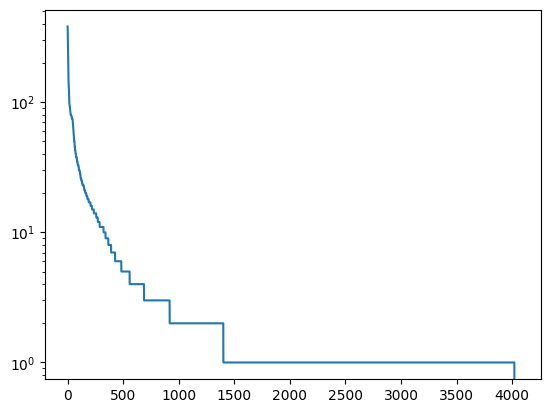

In [34]:
plt.plot(pop[indices])
plt.yscale("log")
pop[indices]

array([1.52108475, 1.52147263, 1.51075347, ..., 0.        , 0.        ,
       0.        ])

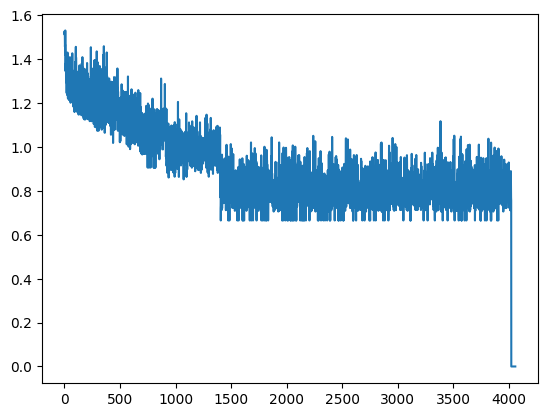

In [31]:
# baseline
plt.plot(Qmagn[indices])
Qmagn[indices]

array([1.49574228, 1.50318075, 1.49701053, ..., 0.        , 0.        ,
       0.        ])

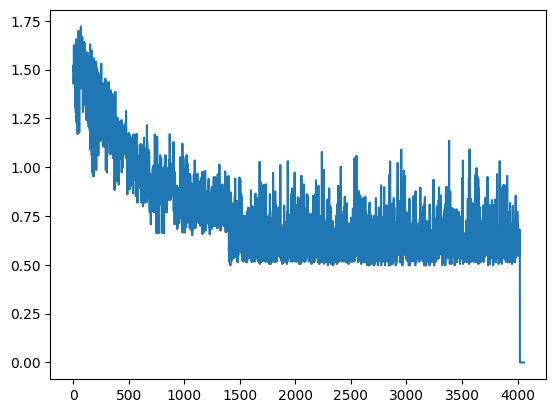

In [41]:
# lower l2
plt.plot(Qmagn[indices])
Qmagn[indices]

array([0.99835925, 0.98017091, 0.94831109, ..., 0.        , 0.        ,
       0.        ])

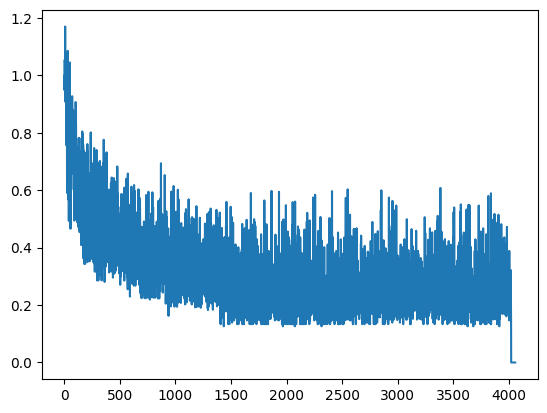

In [47]:
# v = 0
plt.plot(Qmagn[indices])
Qmagn[indices]

### Users

In [57]:
Pmagn = np.linalg.norm(alg.P, axis=1)
# Pmagn

In [58]:
pop = np.asarray(Xtrain.sum(axis=1)).flatten()
# pop

In [59]:
indices = np.argsort(-pop)

array([190, 159, 150, 148, 145, 131, 126, 118, 116, 114])

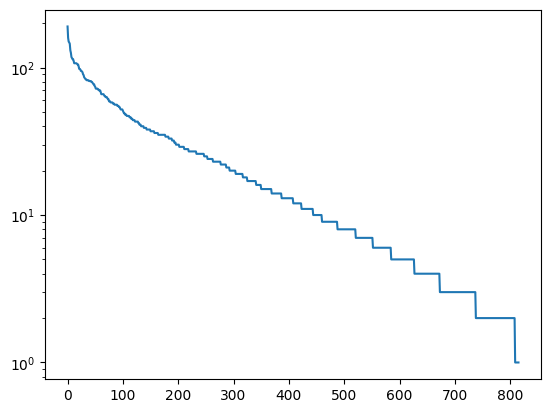

In [63]:
plt.plot(pop[indices])
plt.yscale("log")
pop[indices[:10]]

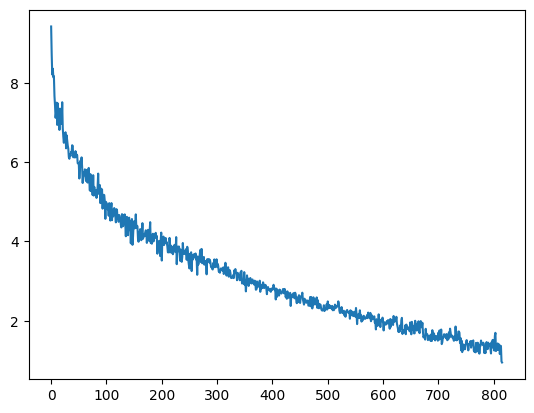

In [62]:
plt.plot(Pmagn[indices])
# Pmagn[indices]

### With normalized user factors and no user regularization

In [81]:
alg = WMF(k=80, l2=10, v=1, alpha=200, max_iterations=10)
alg.fit(Xtrain)

  0%|          | 0/10 [00:00<?, ?it/s]

loss 0
loss 0
loss 0
loss 0
loss 0
loss 0
loss 0
loss 0
loss 0
loss 0


In [82]:
scores = evaluation.base.eval(alg, Xval_in, Xval_out, retarget=True)
print(scores)

Evaluating with 816 users
{'MRR@5': 0.16241830065359478, 'MRR@20': 0.19257423984818814, 'Average Recall@5': 0.29534313725490197, 'Average Recall@20': 0.6041666666666666}


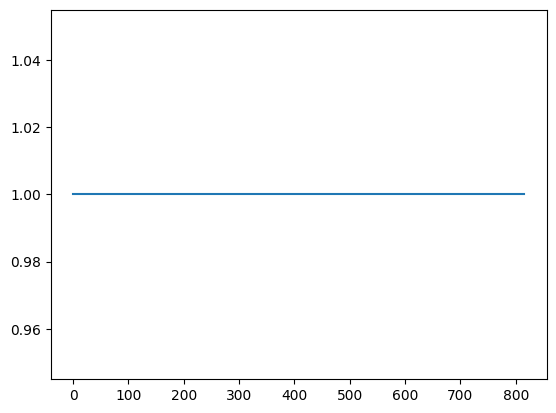

In [80]:
Pmagn = np.linalg.norm(alg.P, axis=1)
plt.plot(Pmagn[indices])